In [1]:
%pylab inline
import numpy as np
import pandas as pd
import skl_emeralds.autohistogram

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Generate some sample data

In [2]:
x = np.linspace(0, 1, 100)
y1 = np.sin(4 * np.pi * x)
y2 = np.sin(2 * np.pi * x)
y = y1 + y2

y -= y.min()
y /= y.sum()

data_x = numpy.random.choice(x, size=10000, p=y)
data_y = np.random.normal(np.sin(3 * np.pi * data_x), 2, size=len(data_x))

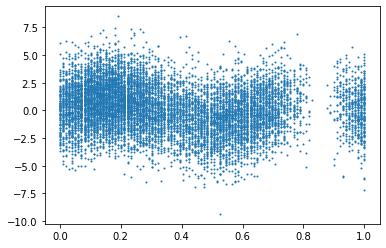

In [3]:
plt.scatter(data_x, data_y, s=1)
plt.show()

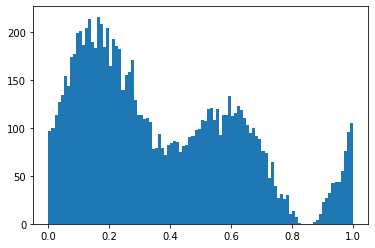

In [4]:
plt.hist(data_x, bins=100)
plt.show()

# Autohistogram

Make a histogram with the number of bins automatically determined from the data, and locate the local minimas.

In [83]:
import importlib
importlib.reload(skl_emeralds.autohistogram)

<module 'skl_emeralds.autohistogram' from '/home/redhog/Projects/Emerald/scikit-learn-emeralds/skl_emeralds/autohistogram.py'>

In [84]:
autohist = skl_emeralds.autohistogram.Autohistogram()
autohist.fit(data_x)

/home/redhog/Projects/Emerald/scikit-learn-emeralds/skl_emeralds/autohistogram.py:239: PeakPropertyWarning: some peaks have a prominence of 0
  ax2.xaxis.set_ticks_position("bottom")
/home/redhog/Projects/Emerald/scikit-learn-emeralds/skl_emeralds/autohistogram.py:239: PeakPropertyWarning: some peaks have a width of 0
  ax2.xaxis.set_ticks_position("bottom")
/home/redhog/Projects/Emerald/scikit-learn-emeralds/skl_emeralds/autohistogram.py:244: PeakPropertyWarning: some peaks have a prominence of 0
  ax.spines["bottom"].set_position(("axes", -0.03))


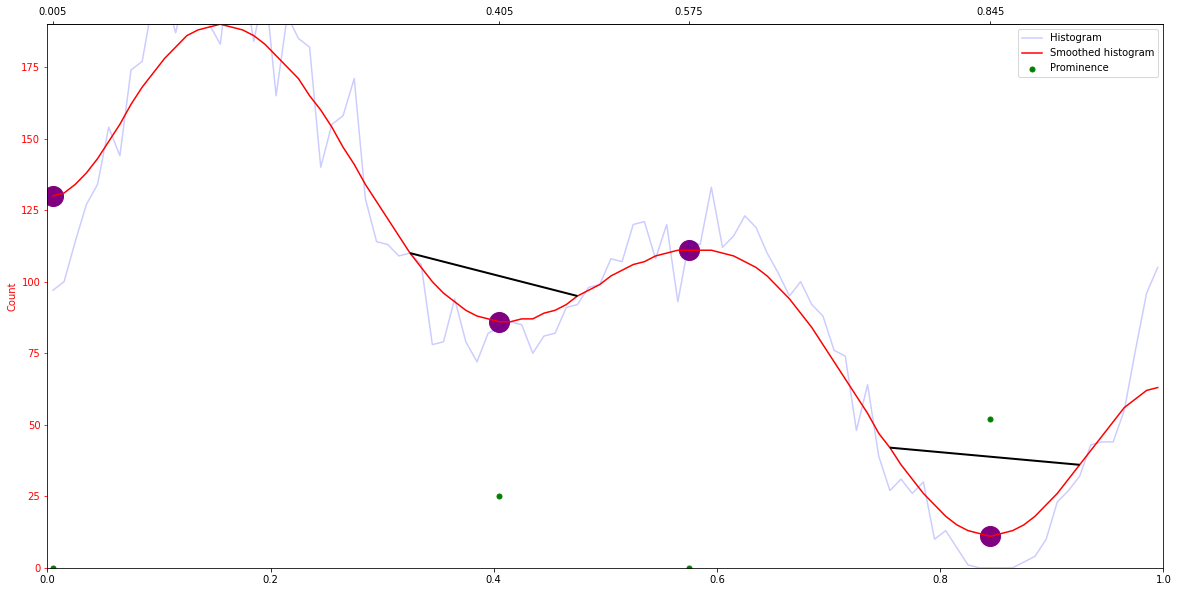

In [85]:
plt.figure(figsize=(20,10))
autohist.plot()

In [86]:
autohist.hist_bin_centers[autohist.minima_idx]

array([0.005, 0.405, 0.575, 0.845])

In [87]:
autohist.bin_edges

array([0.   , 0.005, 0.405, 0.575, 0.845, 1.   ])

In [88]:
autohist.prominence

array([ 0., 25.,  0., 52.])

# Histogram from local minimas
Plot a histogram with bin edges set to the local minimas of the autohistogram:

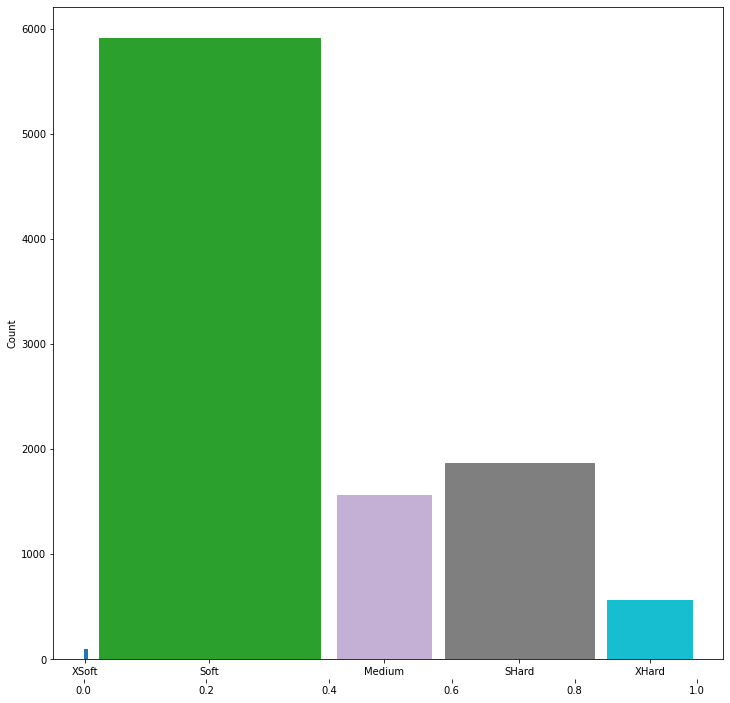

In [92]:
plt.figure(figsize=(12,12))
ax = plt.gca()
autohist.plot_predict(data_x, cmap="tab20")
plt.show()

Same as above, but with bins weighted by data_y:

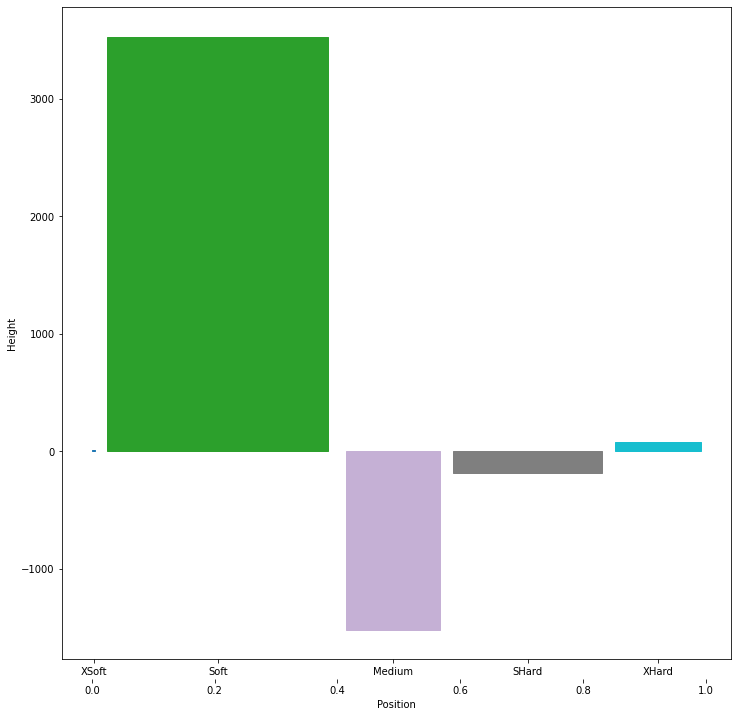

In [71]:
plt.figure(figsize=(12,12))
ax = plt.gca()
autohist.plot_predict(
    pd.Series(data_x, name="Position"),
    pd.Series(data_y, name="Height"), cmap="tab20")
plt.show()

# Data splitting

Make a histogram with the number of bins automatically determined from the data, locate the local minimas
and use them as intervals to split the data into.


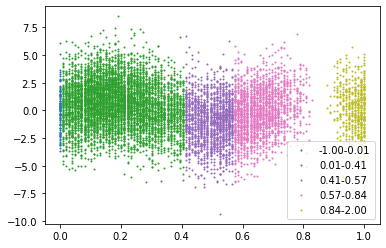

In [93]:
cmap = plt.cm.get_cmap("tab20")
splits = autohist.predict_ranges_filt(data_x)
for idx, (start, end, f) in enumerate(splits):
    plt.scatter(data_x[f], data_y[f], label="%.2f-%.2f" % (start, end), s=1, color=cmap(idx / len(splits)))
plt.legend()
plt.show()